In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.utils import shuffle
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,BatchNormalization,Dropout,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam



In [3]:
#display images
def display_images(images, labels, n_images):
    fig, axes = plt.subplots(1, n_images, figsize=(20,20))
    for i in range(n_images):
        #print image size
        print(f'Image Size: {images[i].shape}')
        #print label
        print(f'Label: {labels[i]}')
        #show image
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(labels[i])

Training Data Shape: (1650,)
Training Labels Shape: (1650,)
Testing Data Shape: (1650,)
Testing Labels Shape: (1650,)
Image Size: (162, 300, 3)
Label: 0
Image Size: (162, 300, 3)
Label: 0
Image Size: (161, 640, 3)
Label: 0
Image Size: (162, 300, 3)
Label: 0
Image Size: (162, 300, 3)
Label: 0


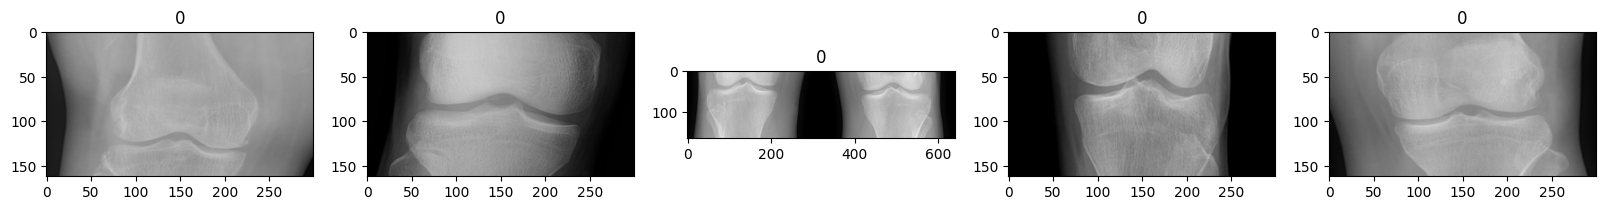

In [4]:
train_class_directory = '/Users/advaysingh/Downloads/archive (11)/MedicalExpert-I'
test_class_directory = '/Users/advaysingh/Downloads/archive (11)/MedicalExpert-II'
mapped_classes = {'0Normal': 0, '1Doubtful' : 1, '2Mild' : 2, '3Moderate' : 3,'4Severe' : 4}

#load images and labels

def load_train_data(train_class_directory, mapped_classes):
    train_images = []
    train_labels = []
    for i in mapped_classes:
        class_directory = os.path.join(train_class_directory, i)
        for filename in os.listdir(class_directory):
            img = cv2.imread(class_directory + '/' + filename)            
            train_images.append(img)
            train_labels.append(mapped_classes[i])
    return train_images, train_labels

def load_test_data(test_class_directory, mapped_classes):
    test_images = []
    test_labels = []
    for i in mapped_classes:
        class_directory = os.path.join(test_class_directory, i)
        for filename in os.listdir(class_directory):
            img = cv2.imread(class_directory + '/' + filename)            
            test_images.append(img)
            test_labels.append(mapped_classes[i])
    return test_images, test_labels


#load train and test data
training_img_data, training_label_data = load_train_data(train_class_directory, mapped_classes)
testing_img_data, testing_label_data = load_test_data(test_class_directory, mapped_classes)

#check the shape of train and test data
print('Training Data Shape:', np.array(training_img_data,dtype="object").shape)
print('Training Labels Shape:', np.array(training_label_data).shape)
print('Testing Data Shape:', np.array(testing_img_data, dtype="object").shape)
print('Testing Labels Shape:', np.array(testing_label_data).shape)

#display some images
display_images(training_img_data, training_label_data, 5)


Resized Training Data Shape: (1650, 200, 200)
Resized Training Labels Shape: (1650,)
Resized Testing Data Shape: (1650, 200, 200)
Resized Testing Labels Shape: (1650,)
Image Size: (200, 200)
Label: 0
Image Size: (200, 200)
Label: 0
Image Size: (200, 200)
Label: 0
Image Size: (200, 200)
Label: 0
Image Size: (200, 200)
Label: 0


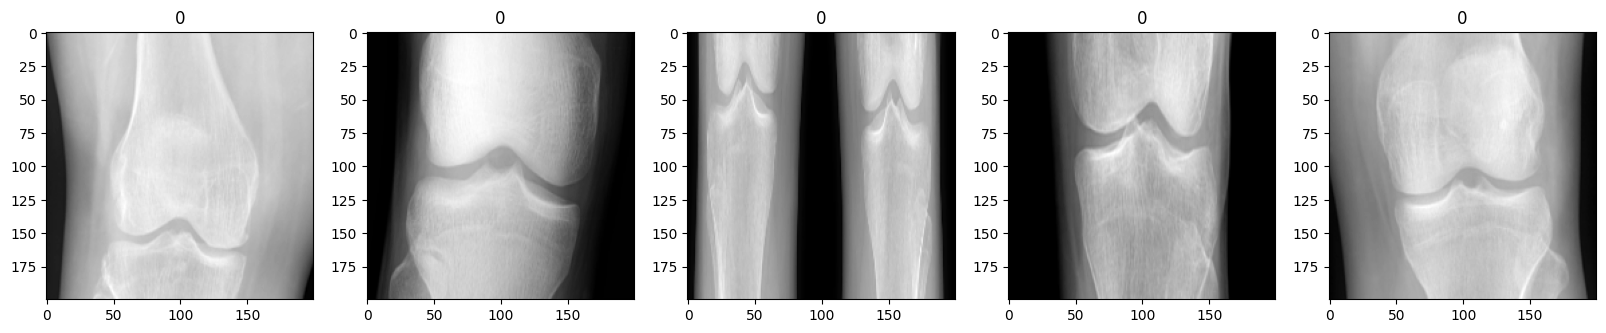

In [5]:
#function to grayscale the images
def grayscale_images(images):
    gray_images = []
    for img in images:
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray_images.append(gray_img)
    return gray_images

#grayscale the training and test images
training_img_data = grayscale_images(training_img_data)
testing_img_data = grayscale_images(testing_img_data)

#function to resize images desired size
def resize_images(images, width, height):
    resized_images = []
    for img in images:
        resized_img = cv2.resize(img, (width, height))
        resized_images.append(resized_img)
    return resized_images

#resize the training and test images
training_img_data = resize_images(training_img_data, 200, 200)
testing_img_data = resize_images(testing_img_data, 200, 200)

#check the shape of resized train and test data
print('Resized Training Data Shape:', np.array(training_img_data, dtype="object").shape)
print('Resized Training Labels Shape:', np.array(training_label_data).shape)
print('Resized Testing Data Shape:', np.array(testing_img_data, dtype="object").shape)
print('Resized Testing Labels Shape:', np.array(testing_label_data).shape)

#display some resized images
display_images(training_img_data, training_label_data, 5)



In [6]:
images = np.concatenate([training_img_data, testing_img_data])
labels = np.concatenate([training_label_data, testing_label_data])

print(images.shape, labels.shape)

#shuffle the data
images, labels = shuffle(images, labels)

print(images.shape, labels.shape)


(3300, 200, 200) (3300,)
(3300, 200, 200) (3300,)


In [7]:


print(labels[10])
#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.25, random_state=42)
X_train = X_train.reshape((2475, 200, 200, 1))
X_test = X_test.reshape((825, 200, 200, 1))

#normalize the images
X_train = X_train / 255.0
X_test = X_test / 255.0

print(y_train.shape)

#convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train[1])




0
(2475,)
[0. 1. 0. 0. 0.]


In [8]:
my_new_model = Sequential()
my_new_model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(200, 200,1)))
my_new_model.add(MaxPooling2D((2, 2)))
my_new_model.add(Conv2D(128, (3, 3), activation='relu'))
my_new_model.add(MaxPooling2D((2, 2)))
my_new_model.add(Flatten())
my_new_model.add(Dense(256, activation='relu'))
my_new_model.add(Dense(128, activation='relu'))
my_new_model.add(Dense(5, activation='softmax'))



# Compile the my_new_model
my_new_model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

/Users/advaysingh/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights = True)

history = my_new_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.2920 - loss: 2.3663 - val_accuracy: 0.3564 - val_loss: 1.4592
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.3408 - loss: 1.4557 - val_accuracy: 0.4024 - val_loss: 1.3735
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 78s 990ms/step - accuracy: 0.4018 - loss: 1.3724 - val_accuracy: 0.4158 - val_loss: 1.3688
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 73s 929ms/step - accuracy: 0.4442 - loss: 1.2816 - val_accuracy: 0.4230 - val_loss: 1.2960
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 73s 928ms/step - accuracy: 0.4478 - loss: 1.2295 - val_accuracy: 0.4473 - val_loss: 1.2207
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.5377 - loss: 1.1228 - val_accuracy: 0.5285 - val_loss: 1.1378
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 74s 951ms/step - accuracy: 0.6212 - loss: 0.9814 - val_accuracy: 0.5430 - val_loss: 1.0888
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 75s 952ms/step - accuracy: 0.6814 - loss: 0.8118 - val_accuracy: 0.6

In [15]:
import keras
path = "./CNNSavedModels/FinalCNNModel.h5"
my_new_model.save(path)
path = "./CNNSavedModels/FinalCNNModel.keras"
keras.saving.save_model(my_new_model, path)

In [11]:
#save history
import pickle
with open('./CNNSavedModels/CNNModel2history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

In [12]:
#print classification report
from sklearn.metrics import classification_report
predictions = my_new_model.predict(X_test)
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1)))

26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 191ms/step
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       254
           1       0.86      0.84      0.85       235
           2       0.78      0.86      0.82       113
           3       0.96      0.91      0.93       118
           4       0.94      0.83      0.88       105

    accuracy                           0.88       825
   macro avg       0.88      0.87      0.88       825
weighted avg       0.88      0.88      0.88       825



Text(0.5, 1.0, 'Confusion Matrix')

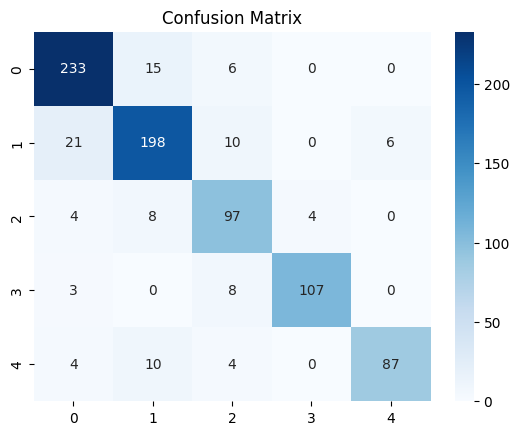

In [13]:
#print confusion matrix graph
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')


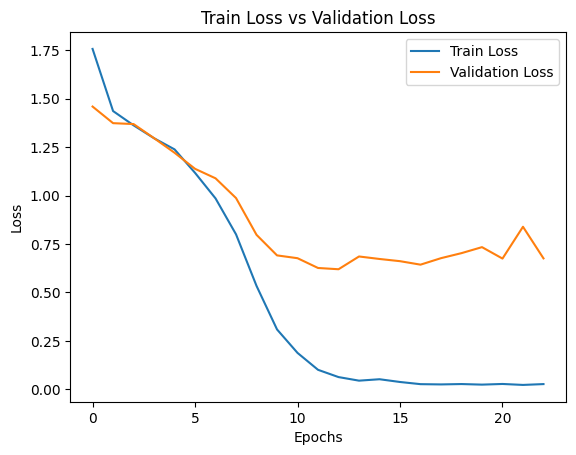

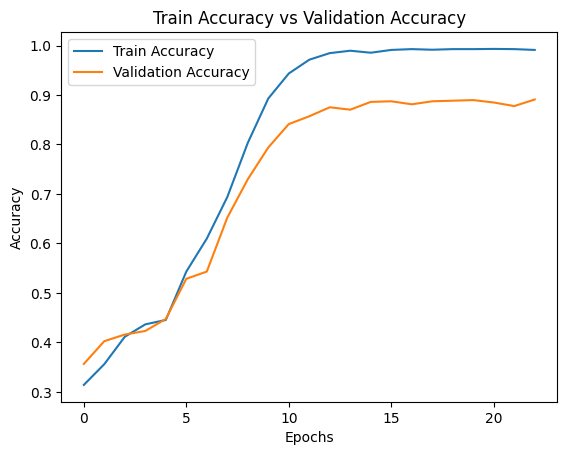

In [14]:
#print graph of train and test loss and accuracy
import pandas as pd

df = pd.DataFrame(history.history)
df[['loss', 'val_loss']].plot()
plt.title('Train Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Validation Loss'])

df[['accuracy', 'val_accuracy']].plot()
plt.title('Train Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'])
